<a href="https://colab.research.google.com/github/lari-guimaraes/Estudos_machine_learning/blob/main/Intervalos_de_Confian%C3%A7a_e_Testes_de_Hip%C3%B3teses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intervalos de Confiança



## Importações

In [ ]:
import numpy as np
from scipy.stats import norm
from scipy import stats
import seaborn as sns
import math

## Base de dados

In [ ]:
dados = np.array([126. , 129.5, 133. , 133. , 136.5, 136.5, 140. , 140. , 140. ,
                   140. , 143.5, 143.5, 143.5, 143.5, 143.5, 143.5, 147. , 147. ,
                   147. , 147. , 147. , 147. , 147. , 150.5, 150.5,  150.5, 150.5,
                   150.5, 150.5, 150.5, 150.5, 154. , 154. , 154. , 154. , 154. ,
                   154. , 154. , 154. , 154. , 157.5, 157.5, 157.5, 157.5, 157.5,
                   157.5, 157.5, 157.5, 157.5, 157.5, 161. , 161. , 161. , 161. ,
                   161. , 161. , 161. , 161. , 161. , 161. , 164.5, 164.5, 164.5,
                   164.5, 164.5, 164.5, 164.5, 164.5, 164.5, 168. , 168. , 168. ,
                   168. , 168. , 168. , 168. , 168. , 171.5, 171.5, 171.5, 171.5,
                   171.5, 171.5, 171.5, 175. , 175. , 175. , 175. , 175. , 175. ,
                   178.5, 178.5, 178.5, 178.5, 182. , 182. , 185.5, 185.5, 189. , 192.5])

In [ ]:
n = len(dados)
n

100

In [ ]:
media = np.mean(dados)
media

159.25

In [ ]:
desvio_padrao = np.std(dados)
desvio_padrao

13.65

### Cálculo do intervalo de confiança - manual

In [ ]:
alpha = 0.05/2
alpha

0.025

In [ ]:
1 - alpha

0.975

In [ ]:
z = norm.ppf(1 - alpha)
z

1.959963984540054

In [ ]:
x_inferior = media - z * (desvio_padrao / math.sqrt(n))
x_inferior

156.57464916110283

In [ ]:
x_superior = media + z * (desvio_padrao / math.sqrt(n))
x_superior

161.92535083889717

In [ ]:
margem_erro = abs(media - x_superior)
margem_erro

2.675350838897174

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


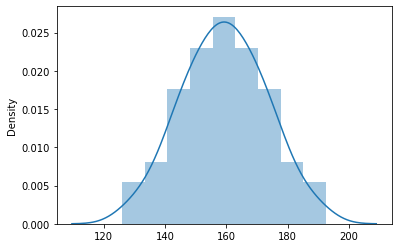

In [ ]:
sns.distplot(dados);

## Cálculo do intervalo e confiança - scipy

In [ ]:
stats.sem(dados)

1.3718766178288244

In [ ]:
desvio_padrao / math.sqrt(n-1)

1.3718766178288246

In [ ]:
intervalos = norm.interval(0.95, media, stats.sem(dados))
intervalos

(156.5611712378229, 161.9388287621771)

In [ ]:
margem_erro = media - intervalos[0]
margem_erro

2.68882876217711

## Diferentes níveis de confiança

In [ ]:
intervalos = norm.interval(0.99, media, stats.sem(dados))
intervalos

(155.71628000694295, 162.78371999305705)

In [ ]:
margem_erro = media - intervalos[0]
margem_erro

3.5337199930570478

In [ ]:
intervalos = norm.interval(0.8, media, stats.sem(dados))
intervalos

(157.49186937268743, 161.00813062731257)

In [ ]:
margem_erro = media - intervalos[0]
margem_erro

1.7581306273125676

## Exercício

In [ ]:
dados_salario = np.array([82.1191, 72.8014, 79.1266, 71.3552, 59.192, 79.1952, 56.518,
                          70.3752, 73.5364, 61.0407, 64.3902, 66.4076, 63.5215, 71.9936,
                          60.1489, 78.5932, 76.0459, 67.7726,64.6149, 80.1948, 76.7998,
                          76.1831, 80.7065, 62.4953, 57.204, 62.5408, 80.0982, 63.287,
                          66.5826, 79.3674])

In [ ]:
media = dados_salario.mean()
media

70.14025666666666

In [ ]:
desvio_padrao = np.std(dados_salario)
desvio_padrao

7.899834598255137

In [ ]:
intervalos = norm.interval(0.95, media, stats.sem(dados_salario))
intervalos

(67.26506308375339, 73.01545024957993)

In [ ]:
# Temos 95% de confiança de que a média salarial das pessoas está no intervalo dentre 67.26 e 73.01

## Testes de Hipóteses

* Resposta sim ou não, para confirmar ou rejeitar uma afirmação.
* Hipótese: ideia a ser testada
* Hipótese nula (H0)
  * Afirmação que já existia
  * Presumir que é verdadeira até que se prove o contrário
* Hipótese alternativa (H1)
  * O que está tentando provar (tudo o que é diferente da nula)
* Alpha
  * Probabilidade de rejeitar a hipótese nula, quanto menor mais seguro é o resultado (nível de significância) - em geral 0,01 ou 0,05.
  * 5% de chances de concluir que existe uma diferença quando não há diferença real
* Valor de p (p-value)
  * p-value >= alpha: não rejeita H0 (não temos evidências)
  * p-value < alpha: rejeita H0 (temos evidência)
* Erro Tipo I: rejeitar a hipótese nula quando não deveria
* Erro Tipo II: não rejeitar nua quando deveria ter rejeitado

## Bibliotecas






In [1]:
import numpy as np
import math
from scipy.stats import norm

## Base de dados

In [2]:
dados_originais = np.array([126. , 129.5, 133. , 133. , 136.5, 136.5, 140. , 140. , 140. ,
                            140. , 143.5, 143.5, 143.5, 143.5, 143.5, 143.5, 147. , 147. ,
                            147. , 147. , 147. , 147. , 147. , 150.5, 150.5, 150.5, 150.5,
                             150.5, 150.5, 150.5, 150.5, 154. , 154. , 154. , 154. , 154. ,
                             154. , 154. , 154. , 154. , 157.5, 157.5, 157.5, 157.5, 157.5,
                             157.5, 157.5, 157.5, 157.5, 157.5, 161. , 161. , 161. , 161. ,
                             161. , 161. , 161. , 161. , 161. , 161. , 164.5, 164.5, 164.5,
                             164.5, 164.5, 164.5, 164.5, 164.5, 164.5, 168. , 168. , 168. ,
                             168. , 168. , 168. , 168. , 168. , 171.5, 171.5, 171.5, 171.5,
                             171.5, 171.5, 171.5, 175. , 175. , 175. , 175. , 175. , 175. ,
                            178.5, 178.5, 178.5, 178.5, 182. , 182. , 185.5, 185.5, 189. , 192.5])

In [3]:
H0_media = np.mean(dados_originais)
H0_media

159.25

In [4]:
H0_desvio_padrao = np.std(dados_originais)
H0_desvio_padrao

13.65

In [5]:
dados_novos = dados_originais * 1.03
dados_novos

array([129.78 , 133.385, 136.99 , 136.99 , 140.595, 140.595, 144.2  ,
       144.2  , 144.2  , 144.2  , 147.805, 147.805, 147.805, 147.805,
       147.805, 147.805, 151.41 , 151.41 , 151.41 , 151.41 , 151.41 ,
       151.41 , 151.41 , 155.015, 155.015, 155.015, 155.015, 155.015,
       155.015, 155.015, 155.015, 158.62 , 158.62 , 158.62 , 158.62 ,
       158.62 , 158.62 , 158.62 , 158.62 , 158.62 , 162.225, 162.225,
       162.225, 162.225, 162.225, 162.225, 162.225, 162.225, 162.225,
       162.225, 165.83 , 165.83 , 165.83 , 165.83 , 165.83 , 165.83 ,
       165.83 , 165.83 , 165.83 , 165.83 , 169.435, 169.435, 169.435,
       169.435, 169.435, 169.435, 169.435, 169.435, 169.435, 173.04 ,
       173.04 , 173.04 , 173.04 , 173.04 , 173.04 , 173.04 , 173.04 ,
       176.645, 176.645, 176.645, 176.645, 176.645, 176.645, 176.645,
       180.25 , 180.25 , 180.25 , 180.25 , 180.25 , 180.25 , 183.855,
       183.855, 183.855, 183.855, 187.46 , 187.46 , 191.065, 191.065,
       194.67 , 198.

In [6]:
H1_media = np.mean(dados_novos)
H1_media

164.0275

In [7]:
H1_desvio_padrao = np.std(dados_novos)
H1_desvio_padrao

14.0595

In [8]:
H1_n = len(dados_novos)
H1_n

100

In [9]:
alpha = 0.05

## Teste de hípotese Z

### teste manual

In [10]:
Z = (H1_media - H0_media) / (H1_desvio_padrao / math.sqrt(H1_n))
Z

3.398058252427187

In [12]:
norm.cdf(Z), norm.ppf(0.9996606701617486)

(0.9996606701617486, 3.3980582524271936)

In [13]:
Z = norm.cdf(Z)
Z

0.9996606701617486

In [14]:
p = 1 - Z
p

0.00033932983825135654

In [15]:
if p < alpha:
  print('Hipótese nula rejeitada')
else:
  print('Hipótese alternativa rejeitada')

Hipótese nula rejeitada


### teste com statsmodels

In [16]:
from statsmodels.stats.weightstats import ztest

In [17]:
_, p = ztest(dados_originais, dados_novos,
             value = H1_media - H0_media,
             alternative='larger')

In [18]:
p

0.9999993877283934

## Teste de Hípotese T

In [19]:
dados_originais = np.array([149. , 160., 147., 189., 175., 168., 156., 160., 152.])

In [20]:
dados_originais.mean(), np.std(dados_originais)

(161.77777777777777, 12.786953227391823)

In [21]:
dados_novos = dados_originais * 1.02
dados_novos

array([151.98, 163.2 , 149.94, 192.78, 178.5 , 171.36, 159.12, 163.2 ,
       155.04])

In [22]:
dados_novos.mean(), np.std(dados_novos)

(165.01333333333332, 13.042692291939664)

In [23]:
from scipy.stats import ttest_rel

In [25]:
_, p = ttest_rel(dados_originais, dados_novos)
p

4.072922493930298e-10

In [26]:
alpha = 0.01
if p <= alpha:
  print('Hipótese nula rejeitada')
else:
  print('Hipótese alternativa rejeitada')

Hipótese nula rejeitada


## Teste qui quadrado

In [27]:
from scipy.stats import chi2_contingency

In [34]:
#tabela = np.array([[30, 20], [22, 28]])
tabela = np.array([[45,5], [5, 45]])

In [29]:
tabela.shape

(2, 2)

In [35]:
_, p, _, _ = chi2_contingency(tabela)
p

6.190717543917382e-15

In [36]:
alpha = 0.05
if p <= alpha:
  print('Hipótese nula rejeitada')
else:
  print('Hipótese alternativa rejeitada')

Hipótese nula rejeitada
